<a href="https://colab.research.google.com/github/AlexKressner/Vorlesung-Industrielles-Management/blob/main/Machine_Learning_Short.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Machine Learning: Regression, Beispiel Immobilienpreise

## 1.1 Daten aus Goolge-Drive importieren

In [ ]:
import pandas as pd

In [ ]:
# Google-Drive einbinden
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/DHBW/Industrielles_Management/Daten/Daten_ML/"

In [ ]:
# Daten laden
data = pd.read_csv(f"{path}house_price.txt")

# nicht relevant für Sie!
data = data.astype({
    "Verkaufsmonat": "O","Baujahr": "O",
    }, errors='raise') 
data.drop(columns=["Qualität_Baustoffe","Zustand_Immobilie",
                   "Heizungsart","Zentrale_Klimaanlage","Kamine"],
          inplace=True
          )

## 1.2 Erster Überblick zum Datensatz

In [ ]:
# Kopfzeile der Daten
data.head()

,Verkaufspreis,Verkaufsmonat,Wohnraum_qm,Keller_qm,Grundstueck_qm,Baujahr
0,208500,2,521.341463,260.975610,2576.219512,2003
1,181500,5,384.756098,384.756098,2926.829268,1976
2,223500,9,544.512195,280.487805,3429.878049,2001
3,140000,2,523.475610,230.487805,2911.585366,1915
4,250000,12,670.121951,349.085366,4347.560976,2000


In [ ]:
# Größe des Datensatzes
# Erste Zahl ist Anzahl der Zeilen, Zweite Zahl Anzahl der Spalten
data.shape

(1460, 6)

## 1.3 Vorgehensmodell zum Training eines ML-Modells
Bitte vergleichen Sie dazu die Ausführungen in der Vorlesungsunterlage!

### 1.3.1 Datensatz in Features und Target teilen
Zunächst einmal müssen wir unterscheiden, was vorhergesagt werden soll (**Target**) und welche Merkmale dazu genutzt werden sollen (**Features**).

In [ ]:
# Features, d.h. womit lässt sich der Immobilienpreis vorhersagen!
X = data.drop(columns="Verkaufspreis")
X.head()

,Verkaufsmonat,Wohnraum_qm,Keller_qm,Grundstueck_qm,Baujahr
0,2,521.341463,260.975610,2576.219512,2003
1,5,384.756098,384.756098,2926.829268,1976
2,9,544.512195,280.487805,3429.878049,2001
3,2,523.475610,230.487805,2911.585366,1915
4,12,670.121951,349.085366,4347.560976,2000


In [ ]:
# Target, d.h. was soll prognostiziert werden!
y = data["Verkaufspreis"]
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: Verkaufspreis, dtype: int64

In [ ]:
X.shape, y.shape

((1460, 5), (1460,))

### 1.3.2 Datensatz in Trainings- und Testmenge aufteilen

Bevor wir gleich zu der Aufteilung in Trainings- & Testdaten zum Training des ML-Verfahrens kommen, müssen die nicht-numerischen Daten passend aufbereitet werden. Das Vorgehen ist dabei immer gleich. Zur Illustration nutzen wir die  die ersten 5 Eintragungen in der Spalte `Verkaufsmonat`.

In [ ]:
example = data["Verkaufsmonat"].head()
example

0     2
1     5
2     9
3     2
4    12
Name: Verkaufsmonat, dtype: object

Wie Ihnen bekannt, enthält die Spalte die jeweilige Heimmannschaft eines Spiels. Wenn wir mit dem Package `sklearn` und den darin verfügbaren ML-Algorithmen arbeiten, müssen wir die Datenstrutkur umwandeln. Dazu nutzen wir die Funktion `get_dummies` wie in der unteren Codezeile dargestellt.

In [ ]:
pd.get_dummies(example)

,2,5,9,12
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,1,0,0,0
4,0,0,0,1


Wir können die Funktion `get_dummies` auf den gesamten Datensatz anwenden und Pandas sucht sich selbst die umzuwandelnden Spalten.



In [ ]:
X = pd.get_dummies(X)
X.head()

,Wohnraum_qm,Keller_qm,Grundstueck_qm,Verkaufsmonat_1,Verkaufsmonat_2,Verkaufsmonat_3,Verkaufsmonat_4,Verkaufsmonat_5,Verkaufsmonat_6,Verkaufsmonat_7,...,Baujahr_2001,Baujahr_2002,Baujahr_2003,Baujahr_2004,Baujahr_2005,Baujahr_2006,Baujahr_2007,Baujahr_2008,Baujahr_2009,Baujahr_2010
0,521.341463,260.975610,2576.219512,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,384.756098,384.756098,2926.829268,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,544.512195,280.487805,3429.878049,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,523.475610,230.487805,2911.585366,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,670.121951,349.085366,4347.560976,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Bei der Aufteilung der Daten in Test- und Trainingsmenge hilft die Funktion `train_test_split`.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Training Algorithmus: X_train (Features), y_train (Target)
# Test des Algorithmus (Bewertung): X_test, y_test
#     1) Algorithmus bekommt Daten (X_test), die er noch nicht kennt & macht Prognose
#     2) Vergleich Prognose mit tatsächlichen Werte (y_test) --> Bewertung

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

**Trainingsdaten:** Das jeweilige ML-Verfahren kennt `y_train` (Target, d.h. Immobilienpreis) und `X_train` (Features, d.h. die zugehörigen Merkmale der Immobilie) und versucht einen Zusammenhang zwischen diesen zu lernen!

In [ ]:
y_train.head()

727     194500
328     214500
958     185000
126     128000
1102    135000
Name: Verkaufspreis, dtype: int64

In [ ]:
X_train.head()

,Wohnraum_qm,Keller_qm,Grundstueck_qm,Verkaufsmonat_1,Verkaufsmonat_2,Verkaufsmonat_3,Verkaufsmonat_4,Verkaufsmonat_5,Verkaufsmonat_6,Verkaufsmonat_7,...,Baujahr_2001,Baujahr_2002,Baujahr_2003,Baujahr_2004,Baujahr_2005,Baujahr_2006,Baujahr_2007,Baujahr_2008,Baujahr_2009,Baujahr_2010
727,375.609756,375.609756,2229.878049,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
328,650.609756,257.317073,3624.390244,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
958,407.621951,407.621951,2576.219512,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
126,292.073171,328.658537,1502.439024,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1102,345.731707,307.926829,2134.146341,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.3.3 Modell auswählen

Für Regressions- und Klassifikationsprobleme gibt es eine Unmenge an ML-Verfahren. Eine Übersicht finden Sie [hier](https://scikit-learn.org/stable/). Wir werden das Verfahren `Random Forest` verwenden. Es gehört zu den besten und robustestens Verfahren im Bereich Machine Learning und wird aus diesem Grund häufig in der Praxis eingesetzt.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()

### 1.3.4 Modell trainieren

Das Random Forest Verfahren versucht nun einen Zusammenhang zwischen den Features und dem Target zu lernen und minimiert dabei ein Fehlermaß. In der Grundeinstellung wird die Summe der quadrierten Fehler minimiert, d.h. $∑(y_i - \hat{y}_i)^2$ mit $y=$Preis Immobilie $i$ und $\hat{y}=$Prognose Preis Immobilie $i$.

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor()

### 1.3.5 Modell anwenden

Zu diesem Zweck nutzen wir nun die **Testdaten**. Das ML-Verfahren erhält die Daten `X_test`, d.h. die Merkmale einer Immobilie und wendet die gelernten Zusammenhänge zur Prognose des Targets an!

In [ ]:
X_test.head()

,Wohnraum_qm,Keller_qm,Grundstueck_qm,Verkaufsmonat_1,Verkaufsmonat_2,Verkaufsmonat_3,Verkaufsmonat_4,Verkaufsmonat_5,Verkaufsmonat_6,Verkaufsmonat_7,...,Baujahr_2001,Baujahr_2002,Baujahr_2003,Baujahr_2004,Baujahr_2005,Baujahr_2006,Baujahr_2007,Baujahr_2008,Baujahr_2009,Baujahr_2010
140,263.414634,263.414634,3201.219512,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
950,263.414634,263.414634,2195.121951,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
248,508.536585,256.097561,3450.304878,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1360,792.987805,186.585366,3000.609756,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
568,650.000000,456.097561,3758.231707,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_pred = model.predict(X_test)
y_pred[:10]

array([111009.5       , 123288.5       , 193896.5       , 203509.61      ,
       263009.08      , 119170.76666667, 163759.5       , 158173.08      ,
       148767.        , 111474.18      ])

### 1.3.6 Modell evaluieren

Nachdem nun Prognosewerte durch das angelernte Verfahren berechnet wurden, können wir diese mit den tatsächlichen Werten des Target, also den tatsächlichen Immobilienpreisen vergleichen (`y_test`). Daraus können wir dann die Güte eines Verfahrens ableiten!

In [ ]:
import sklearn.metrics
import matplotlib.pyplot as plt

In [ ]:
# Genauigkeit des Modells auf der Testmenge, mittlerer absoluter Fehler 
sklearn.metrics.mean_absolute_error(y_test, y_pred)

31471.08949445531

In [ ]:
# Genauigkeit des Modells auf der Testmenge, mittlerer absoluter prozentualer Fehler 
sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)

0.18426101620662838

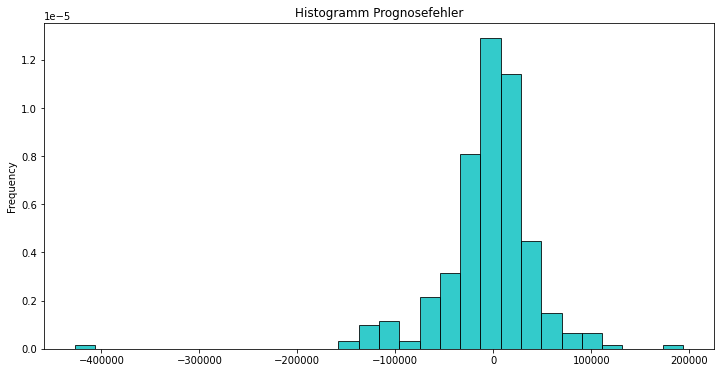

In [ ]:
(y_test - y_pred).plot(
    kind="hist",
    title= "Histogramm Prognosefehler",
    figsize=(12,6),
    color="c",
    edgecolor='k',
    density=True,
    alpha=0.8, 
    bins=30    
    )
plt.show()

### 1.3.7 Modell anwenden

In [ ]:
immobilie = X_test.head(1).copy()

In [ ]:
immobilie["Wohnraum_qm"]= 50
immobilie["Keller_qm"]= 500
immobilie["Grundstueck_qm"]= 10
immobilie["Verkaufsmonat_4"]= 0
immobilie["Verkaufsmonat_6"]= 1

In [ ]:
model.predict(immobilie)

array([206018.45])

In [ ]:
from sklearn.model_selection import GridSearchCV
from joblib import dump

In [ ]:
# grid definieren
param_grid = {
    "n_estimators": [50, 100, 150, 200, 300],
}

In [ ]:
grid = GridSearchCV(
    model,
    param_grid,
    cv=10,
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    return_train_score=False,
)

In [ ]:
grid.fit(X, y)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [50, 100, 150, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
grid_search_results = pd.DataFrame(grid.cv_results_)[
    ["mean_test_score", "std_test_score", "params"]
]
grid_search_results

,mean_test_score,std_test_score,params
0,-1.959736e+09,7.685486e+08,{'n_estimators': 50}
1,-1.947924e+09,8.094847e+08,{'n_estimators': 100}
2,-1.962978e+09,8.026185e+08,{'n_estimators': 150}
3,-1.939572e+09,7.666408e+08,{'n_estimators': 200}
4,-1.941957e+09,7.652648e+08,{'n_estimators': 300}


In [ ]:
best_model = grid.best_estimator_

In [ ]:
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
best_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [ ]:
# save model
dump(best_model, f"{path}house_price_model.joblib")

['/content/drive/MyDrive/DHBW/Industrielles_Management/Daten/ML_Exkurs/house_price_model.joblib']

In [ ]:
feature_importances = pd.DataFrame(
    best_model.feature_importances_, index=X.columns, columns=["Feature Importance"]
)

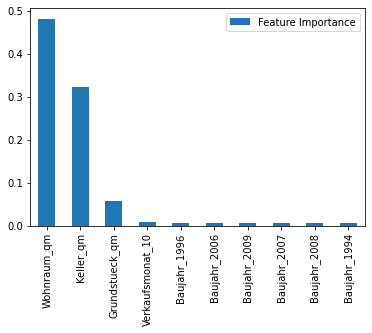

In [ ]:
feature_importances.sort_values(by="Feature Importance", ascending=False).head(10).plot(
    kind="bar"
)

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)

0.1557850717239252

# 2 Machine Learning, Klassifikation, Beispiel Diabetes
Im nachfolgenden Beispiel werden wir ein ML-Verfahren einsetzen, um anhand von Untersuchungsergebnissen vorherzusagen, ob ein Patient Diabetes hat. Es handelt sich dabei um eine Klassifikationsproblem (Diabetes/ keine Diabetes). Wir verwenden einen Datensatz mit folgenden Informationen:
1. Anzahl Schwangerschaften
1. Glukosekonzentration nach Glukosetoleranztest
1. Blutdruck (mm Hg)
1. Dicke der Trizepshautfalte (mm)
1. Insulinwert (mu U/ml)
1. Body mass index 
1. Diabetesvorbelastungsfunktion
1. Alter (Jahre)
1. Diabetes (0/1)

Die relevanten Daten haben die folgende Form:

In [ ]:
data = pd.read_csv(f"{path}diabetes.txt")
data.head()

,schwangerschaften,glukose_konzentration,blutdruck,dicke_trizepshautfalte,insulin_wert,bmi,diabetes_vorbelastung,alter,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2.1 Datensatz in Features und Target teilen

Wie bereits zuvor müssen wir unterscheiden, was vorhergesagt werden soll (**Target**) und welche Merkmale dazu genutzt werden sollen (**Features**).

In [ ]:
# Features, d.h. womit lässt sich Diabetes prognostizeren!
X = data.drop(columns="diabetes")
X.head()

,schwangerschaften,glukose_konzentration,blutdruck,dicke_trizepshautfalte,insulin_wert,bmi,diabetes_vorbelastung,alter
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
# Target, d.h. was soll prognostiziert werden!
y = data["diabetes"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

## 2.2 Datensatz in Trainings- und Testmenge aufteilen
Erneut müssen wir die Daten aufteilen. Da wir ausschließlich mit numerischen Daten arbeiten, müssen wir keine Datenaufbereitung über `pd.get_dummies` vornehmen.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# X und y werden in Trainings- und Testmenge aufgeteilt, so dass die Testmenge 20% der vorhandenen Daten hat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
y_train.head()

468    1
478    0
107    0
304    0
515    1
Name: diabetes, dtype: int64

In [ ]:
X_train.head()

,schwangerschaften,glukose_konzentration,blutdruck,dicke_trizepshautfalte,insulin_wert,bmi,diabetes_vorbelastung,alter
468,8,120,0,0,0,30.0,0.183,38
478,8,126,74,38,75,25.9,0.162,39
107,4,144,58,28,140,29.5,0.287,37
304,3,150,76,0,0,21.0,0.207,37
515,3,163,70,18,105,31.6,0.268,28


## 2.3 Modell auswählen

Erneut verwenden wir das Verfahren `Random Forest`. Sie müssen allerdings darauf achten, dass Sie einen Random Forest zur Klassifikation importieren. Aus diesem Grund verwenden wir das Verfahren `RandomForestClassifier`. Für die Regressionaufgabe hatten wir das Verfahren `RandomForestRegressor` genutzt. Achten Sie auf diesen wichtigen Unterschied!

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

## 2.4 Modell trainieren

Das Random Forest Verfahren versucht nun einen Zusammenhang zwischen den Features und dem Target zu lernen und minimiert dabei ein Fehlermaß. Letzteres misst den Grad der Fehlklassifikation. Beispiel für Fehlklassifikation: Das Modell prognostiziert Diabetes für einen Patienten, in der Realität liegt die Erkrankung aber nicht vor.

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier()

## 2.5 Modell anwenden

Das ML-Verfahren erhält die Daten `X_test`, d.h. die Untersuchungsergebnisse mit den relevanten Merkmalen und wendet die gelernten Zusammenhänge zur Prognose des Targets an, d.h. dem Vorhandensein von Diabetes (0/1)!

In [ ]:
X_test.head()

,schwangerschaften,glukose_konzentration,blutdruck,dicke_trizepshautfalte,insulin_wert,bmi,diabetes_vorbelastung,alter
51,1,101,50,15,36,24.2,0.526,26
378,4,156,75,0,0,48.3,0.238,32
27,1,97,66,15,140,23.2,0.487,22
579,2,197,70,99,0,34.7,0.575,62
86,13,106,72,54,0,36.6,0.178,45


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
X_test["Diabetes"]=y_pred

In [ ]:
cols = X_test.columns[:-1].to_list()
X_test = X_test[["Diabetes"]+cols]

In [ ]:
X_test.head()

,Diabetes,schwangerschaften,glukose_konzentration,blutdruck,dicke_trizepshautfalte,insulin_wert,bmi,diabetes_vorbelastung,alter
51,0,1,101,50,15,36,24.2,0.526,26
378,1,4,156,75,0,0,48.3,0.238,32
27,0,1,97,66,15,140,23.2,0.487,22
579,1,2,197,70,99,0,34.7,0.575,62
86,0,13,106,72,54,0,36.6,0.178,45


## 2.6 Modell evaluieren

Die Modellbewertung erfolgt bei der Klassifikation regelmäßg nach dem Kriterium der "Accuracy" (andere kommen aber auch zum Einsatz). Die Accuracy setzt die Anzahl der korrekten Klassifikation in das Verhältnis zur Anzahl aller Beobachtungen. Dementsprechend stellt sie den Anteil der korrekten Klassifikationen dar.

In [ ]:
sklearn.metrics.accuracy_score(y_test, y_pred) * 100

74.67532467532467

In [ ]:
neue_person = X_test.drop(columns="Diabetes").head(1).copy()
neue_person["schwangerschaften"] = 0
neue_person["glukose_konzentration"] = 100
neue_person["blutdruck"] = 55
neue_person["bmi"] = 20
neue_person

,schwangerschaften,glukose_konzentration,blutdruck,dicke_trizepshautfalte,insulin_wert,bmi,diabetes_vorbelastung,alter
51,0,100,55,15,36,20,0.526,26


In [ ]:
model.predict(neue_person)

array([0])

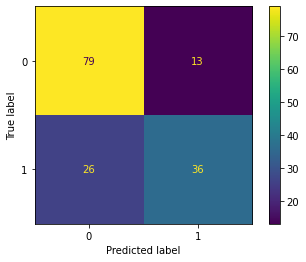

In [ ]:
conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = sklearn.metrics.ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
# grid definieren
param_grid = {
    "n_estimators": [50, 100, 150, 200, 300],
}

In [ ]:
grid = GridSearchCV(
    model,
    param_grid,
    cv=10,
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    return_train_score=False,
)

In [ ]:
grid.fit(X, y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [50, 100, 150, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
best_model = grid.best_estimator_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
best_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# save model
dump(best_model, f"{path}house_price_model.joblib")

['/content/drive/MyDrive/DHBW/Industrielles_Management/Daten/ML_Exkurs/house_price_model.joblib']

In [ ]:
feature_importances = pd.DataFrame(
    best_model.feature_importances_, index=X.columns, columns=["Feature Importance"]
)

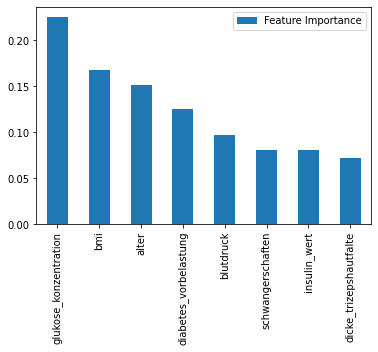

In [ ]:
feature_importances.sort_values(by="Feature Importance", ascending=False).head(10).plot(
    kind="bar"
)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
sklearn.metrics.accuracy_score(y_test, y_pred) * 100

97.40259740259741

# 3 Aufgabe: Prognose von Umsätzen

Bitte prognostizieren Sie die Umsätze eines Unternehmens in Abhängigkeit der eingesetzten Mittel für die verschiedenen Marketingkanäle (TV, Radio, Social Media & Influencer). Die Daten finden Sie im Moodle-Raum.

In [ ]:
data = pd.read_csv(f"{path}advertising_and_sales.txt")
data.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [ ]:
data.shape

(4546, 5)